In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [176]:
########## GRIEWANK #############
def bb_GRIEWANK(x):
    f = 1e20;
    f = 1.0 + (x[0]*x[0] + x[1]*x[1]) / 4000.0 - np.cos(x[0]) * np.cos(x[1]/np.sqrt(2.0))
    return f

startPtsGRIEWANK =np.array([[0.0,-357.4],
                    [535.1, 89.17],
                    [50.66, 324.4],
                    [160.9, 573.6],
                    [-386.4, 378.7],
                    [247.7, -189.6],
                    [-263.4, -159.3],
                    [-478.9, -269.4],
                    [-66.58, -479.8],
                    [287.7, -398.7],
                    [128.3, 13.74],
                    [91.78, 218.6],
                    [-423.1, -309.5],
                    [561.8, 493.1],
                    [208.3, -25.98],
                    [-181.8, -224.8],
                    [-554.8, -79.05],
                    [-105.3, -113.4],
                    [-27.35, 295.1],
                    [-340.2, 247.3],
                    [404.9, -540.3],
                    [-305.5, -504.9],
                    [373, 41.45],
                    [-507.4, -422.3],
                    [485.5, 128.7],
                    [335.3, 409.6],
                    [-595.2, 165.5],
                    [-232.8, -596.7],
                    [449.7, 458],
                    [-141.8, 521.2]])

In [177]:
####### COORDINATE SEARCH ALGORITHM - NO EXTENSIONS #######

"""
bb: Black box function, takes x0 as argument
x0: Tuple, inital point
step: Initial step distance
evalBdgt: Total evaluations budget 
upBound: Upper boundary for all dimension of x0
lowBound: Lower boundary for all dimension of x0
"""   
def coodSearch(bb, x0, step, evalBdgt, upBound, lowBound):
 
    initialEvBdgt = evalBdgt
    
    def checkOutOfBounds(x):
        return (x>upBound).sum()>0 or (x<lowBound).sum()>0
    
    if checkOutOfBounds(np.array(x0)):
        print("Initial points should be inside boundaries")
        return
    
    df = pd.DataFrame()
    cache = dict()
    minObj = bb(x0)
    cache[x0] = minObj
    evalBdgt = evalBdgt - 1
    
    #Creating new initial row for dataframe
    newRow = dict()
    newRow['Step'] = initialEvBdgt-evalBdgt
    for i in range(len(x0)):
        newRow[i]=x0[i]
    newRow['Obj'] = minObj
    df = df.append(newRow, ignore_index=True)
    
    #Main loop
    while(evalBdgt > 0):
        
        #Generating candidates
        points = np.zeros((len(x0)*2, len(x0)))
        values = np.full(len(x0)*2, np.inf)
        
        for k in range(len(x0)):
            points[k] = x0
            points[k,k] = points[k,k]+step
            points[len(x0)+k] = x0
            points[len(x0)+k, k] = points[len(x0)+k, k]-step
        
        #Evaluating candidates
        for i in range(len(points)):
            if(evalBdgt > 0):
                #failure case
                if(tuple(points[i]) in cache or checkOutOfBounds(points[i])):
                    step = step/2
                    break
                else:
                    values[i] = bb(points[i])
                    evalBdgt = evalBdgt-1
                    cache[tuple(points[i])] = values[i]
            else:
                break
        
        #Results
        minVal = np.min(values)
        
        if(minVal < minObj):
            #Updating final values
            minObj = minVal
            x0 = points[np.argmin(values)]
            
            #Creating new row for dataframe
            newRow = dict()
            newRow['Step'] = initialEvBdgt-evalBdgt
            for i in range(len(x0)):
                newRow[i]=x0[i]
            newRow['Obj'] = minObj
            df = df.append(newRow, ignore_index=True)
        
        #Stopping criterion
        if(step<1e-15):
            break
            
    return (df.set_index('Step'))





In [178]:
####### COORDINATE SEARCH ALGORITHM - OPPORTUNISTIC #######
"""
bb: Black box function, takes x0 as argument
x0: Tuple, inital point
step: Initial step distance
evalBdgt: Total evaluations budget
upBound: Upper boundary for all dimension of x0
lowBound: Lower boundary for all dimension of x0
"""   
def coodSearchOpp(bb, x0, step, evalBdgt, upBound, lowBound):
 
    initialEvBdgt = evalBdgt
    
    def checkOutOfBounds(x):
        return (x>upBound).sum()>0 or (x<lowBound).sum()>0
    
    if checkOutOfBounds(np.array(x0)):
        print("Initial points should be inside boundaries")
        return
    
    df = pd.DataFrame()
    cache = dict()
    minObj = bb(x0)
    cache[x0] = minObj
    evalBdgt = evalBdgt - 1
    
    #Creating new initial row for dataframe
    newRow = dict()
    newRow['Step'] = initialEvBdgt-evalBdgt
    for i in range(len(x0)):
        newRow[i]=x0[i]
    newRow['Obj'] = minObj
    df = df.append(newRow, ignore_index=True)
    
    #Main loop
    while(evalBdgt > 0):
        
        #Generating candidates
        points = np.zeros((len(x0)*2, len(x0)))
        values = np.full(len(x0)*2, np.inf)
        
        for k in range(len(x0)):
            points[k] = x0
            points[k,k] = points[k,k]+step
            points[len(x0)+k] = x0
            points[len(x0)+k, k] = points[len(x0)+k, k]-step
        
        #Evaluating candidates
        for i in range(len(points)):
            if(evalBdgt > 0):
                #failure case
                if(tuple(points[i]) in cache or checkOutOfBounds(points[i])):
                    step = step/2
                    break
                else:
                    values[i] = bb(points[i])
                    evalBdgt = evalBdgt-1
                    if(values[i] < minObj):
                        break
                    cache[tuple(points[i])] = values[i]
            else:
                break
        
        #Results
        minVal = np.min(values)
        
        if(minVal < minObj):
            #Updating final values
            minObj = minVal
            x0 = points[np.argmin(values)]
            
            #Creating new row for dataframe
            newRow = dict()
            newRow['Step'] = initialEvBdgt-evalBdgt
            for i in range(len(x0)):
                newRow[i]=x0[i]
            newRow['Obj'] = minObj
            df = df.append(newRow, ignore_index=True)
        
        #Stopping criterion
        if(step<1e-15):
            break
            
            
    return (df.set_index('Step'))


In [179]:
####### COORDINATE SEARCH ALGORITHM - DYNAMIC #######
"""
bb: Black box function, takes x0 as argument
x0: Tuple, inital point
step: Initial step distance
evalBdgt: Total evaluations budget 
upBound: Upper boundary for all dimension of x0
lowBound: Lower boundary for all dimension of x0
"""   
def coodSearchDyn(bb, x0, step, evalBdgt, upBound, lowBound):
 
    initialEvBdgt = evalBdgt
    bestDirection = 0
    
    def checkOutOfBounds(x):
        return (x>upBound).sum()>0 or (x<lowBound).sum()>0
    
    if checkOutOfBounds(np.array(x0)):
        print("Initial points should be inside boundaries")
        return
    
    df = pd.DataFrame()
    cache = dict()
    minObj = bb(x0)
    cache[x0] = minObj
    evalBdgt = evalBdgt - 1
    
    #Creating new initial row for dataframe
    newRow = dict()
    newRow['Step'] = initialEvBdgt-evalBdgt
    for i in range(len(x0)):
        newRow[i]=x0[i]
    newRow['Obj'] = minObj
    df = df.append(newRow, ignore_index=True)
    
    #Main loop
    while(evalBdgt > 0):
        
        #Generating candidates
        points = np.zeros((len(x0)*2, len(x0)))
        values = np.full(len(x0)*2, np.inf)
        
        for k in range(len(x0)):
            points[k] = x0
            points[k,k] = points[k,k]+step
            points[len(x0)+k] = x0
            points[len(x0)+k, k] = points[len(x0)+k, k]-step
        
        #Evaluating candidates
        for i in range(len(points)):
            if(evalBdgt > 0):
                #failure case
                if(tuple(points[bestDirection-i]) in cache or checkOutOfBounds(points[bestDirection-i])):
                    step = step/2
                    break
                else:
                    values[bestDirection-i] = bb(points[bestDirection-i])
                    evalBdgt = evalBdgt-1
                    if(values[bestDirection-i] < minObj):
                        bestDirection = (bestDirection-i) if (bestDirection-i)>=0 else (len(points)+bestDirection-i)
                        break
                    cache[tuple(points[bestDirection-i])] = values[bestDirection-i]
            else:
                break
        
        #Results
        minVal = np.min(values)
        
        if(minVal < minObj):
            #Updating final values
            minObj = minVal
            x0 = points[np.argmin(values)]
            
            #Creating new row for dataframe
            newRow = dict()
            newRow['Step'] = initialEvBdgt-evalBdgt
            for i in range(len(x0)):
                newRow[i]=x0[i]
            newRow['Obj'] = minObj
            df = df.append(newRow, ignore_index=True)
        
        #Stopping criterion
        if(step<1e-15):
            break
            
            
    return (df.set_index('Step'))


In [125]:
#Running Coordinate Search for all starting Points and saving to .txt format
for i in range(len(startPtsGRIEWANK)):
    df = coodSearch(bb=bb_GRIEWANK, 
                    x0=tuple(startPtsGRIEWANK[i]),
                    step=250,
                    evalBdgt=2000,
                    upBound=600,
                    lowBound=-600)
    df.to_csv('/home/noyt/Desktop/BA6/MTH8418/Devoir2/executions/executions/GRIEWANK/{}/COOD_SEARCH_REGULAR/res.txt'.format(i+1), header=None, sep='\t')
    
    df = coodSearchOpp(bb=bb_GRIEWANK, 
                    x0=tuple(startPtsGRIEWANK[i]),
                    step=250,
                    evalBdgt=2000,
                    upBound=600,
                    lowBound=-600)
    df.to_csv('/home/noyt/Desktop/BA6/MTH8418/Devoir2/executions/executions/GRIEWANK/{}/COOD_SEARCH_OPPORTUNISTIC/res.txt'.format(i+1), header=None, sep='\t')
    
    df = coodSearchDyn(bb=bb_GRIEWANK, 
                    x0=tuple(startPtsGRIEWANK[i]),
                    step=250,
                    evalBdgt=2000,
                    upBound=600,
                    lowBound=-600)
    df.to_csv('/home/noyt/Desktop/BA6/MTH8418/Devoir2/executions/executions/GRIEWANK/{}/COOD_SEARCH_DYNAMIC/res.txt'.format(i+1), header=None, sep='\t')
    

In [181]:
#Running Coordinate Search for all starting Points and saving to .xlsx format

#With step = 20
dfReg = pd.DataFrame()
dfOpp = pd.DataFrame()
dfDyn = pd.DataFrame()

for i in range(len(startPtsGRIEWANK)):
    
    idx = np.arange(1, 2000)
    
    #Regular
    df = coodSearch(bb=bb_GRIEWANK, 
                    x0=tuple(startPtsGRIEWANK[i]),
                    step=20,
                    evalBdgt=2000,
                    upBound=600,
                    lowBound=-600)
    
    df = pd.DataFrame.from_dict(
               {i: x.values  for i, x in df.groupby('Step')['Obj']},
                orient='index').reindex(idx).ffill()
    dfReg[i] = df[0]
    
    
    #Opportunistic
    df = coodSearchOpp(bb=bb_GRIEWANK, 
                    x0=tuple(startPtsGRIEWANK[i]),
                    step=20,
                    evalBdgt=2000,
                    upBound=600,
                    lowBound=-600)
    
    df = pd.DataFrame.from_dict(
               {i: x.values  for i, x in df.groupby('Step')['Obj']},
                orient='index').reindex(idx).ffill()
    dfOpp[i] = df[0]
    
    #Dynamic
    df = coodSearchDyn(bb=bb_GRIEWANK, 
                    x0=tuple(startPtsGRIEWANK[i]),
                    step=20,
                    evalBdgt=2000,
                    upBound=600,
                    lowBound=-600)
    
    df = pd.DataFrame.from_dict(
               {i: x.values  for i, x in df.groupby('Step')['Obj']},
                orient='index').reindex(idx).ffill()
    dfDyn[i] = df[0]
    
dfReg.to_csv('/home/noyt/Desktop/BA6/MTH8418/Devoir2/executions/executions/GRIEWANK/ExcelFormat/COOD_SEARCH_REGULAR/coor20.xlsx'.format(i+1), header=None, sep='\t')
dfOpp.to_csv('/home/noyt/Desktop/BA6/MTH8418/Devoir2/executions/executions/GRIEWANK/ExcelFormat/COOD_SEARCH_OPPORTUNISTIC/coor20_2.xlsx'.format(i+1), header=None, sep='\t')
dfDyn.to_csv('/home/noyt/Desktop/BA6/MTH8418/Devoir2/executions/executions/GRIEWANK/ExcelFormat/COOD_SEARCH_DYNAMIC/coor20_3.xlsx'.format(i+1), header=None, sep='\t')

dfReg = pd.DataFrame()
dfOpp = pd.DataFrame()
dfDyn = pd.DataFrame()

#With step = 240
for i in range(len(startPtsGRIEWANK)):
    
    idx = np.arange(1, 2000)
    
    #Regular
    df = coodSearch(bb=bb_GRIEWANK, 
                    x0=tuple(startPtsGRIEWANK[i]),
                    step=240,
                    evalBdgt=2000,
                    upBound=600,
                    lowBound=-600)
    
    df = pd.DataFrame.from_dict(
               {i: x.values  for i, x in df.groupby('Step')['Obj']},
                orient='index').reindex(idx).ffill()
    dfReg[i] = df[0]
    
    
    #Opportunistic
    df = coodSearchOpp(bb=bb_GRIEWANK, 
                    x0=tuple(startPtsGRIEWANK[i]),
                    step=240,
                    evalBdgt=2000,
                    upBound=600,
                    lowBound=-600)
    
    df = pd.DataFrame.from_dict(
               {i: x.values  for i, x in df.groupby('Step')['Obj']},
                orient='index').reindex(idx).ffill()
    dfOpp[i] = df[0]
    
    #Dynamic
    df = coodSearchDyn(bb=bb_GRIEWANK, 
                    x0=tuple(startPtsGRIEWANK[i]),
                    step=240,
                    evalBdgt=2000,
                    upBound=600,
                    lowBound=-600)
    
    df = pd.DataFrame.from_dict(
               {i: x.values  for i, x in df.groupby('Step')['Obj']},
                orient='index').reindex(idx).ffill()
    dfDyn[i] = df[0]
    
dfReg.to_csv('/home/noyt/Desktop/BA6/MTH8418/Devoir2/executions/executions/GRIEWANK/ExcelFormat/COOD_SEARCH_REGULAR/coor240.xlsx'.format(i+1), header=None, sep='\t')
dfOpp.to_csv('/home/noyt/Desktop/BA6/MTH8418/Devoir2/executions/executions/GRIEWANK/ExcelFormat/COOD_SEARCH_OPPORTUNISTIC/coor240_2.xlsx'.format(i+1), header=None, sep='\t')
dfDyn.to_csv('/home/noyt/Desktop/BA6/MTH8418/Devoir2/executions/executions/GRIEWANK/ExcelFormat/COOD_SEARCH_DYNAMIC/coor240_3.xlsx'.format(i+1), header=None, sep='\t')

In [189]:
print(coodSearch(bb=bb_GRIEWANK, 
                    x0=tuple(startPtsGRIEWANK[6]),
                    step=20,
                    evalBdgt=2000,
                    upBound=600,
                    lowBound=-600))
print(coodSearchOpp(bb=bb_GRIEWANK, 
                    x0=tuple(startPtsGRIEWANK[6]),
                    step=20,
                    evalBdgt=2000,
                    upBound=600,
                    lowBound=-600))
print(coodSearchDyn(bb=bb_GRIEWANK, 
                    x0=tuple(startPtsGRIEWANK[6]),
                    step=20,
                    evalBdgt=2000,
                    upBound=600,
                    lowBound=-600))


                0           1        Obj
Step                                    
1.0   -263.400000 -159.300000  23.898139
5.0   -243.400000 -159.300000  22.220906
7.0   -243.400000 -139.300000  20.629430
11.0  -233.400000 -139.300000  19.738312
13.0  -223.400000 -139.300000  17.910350
17.0  -218.400000 -139.300000  17.802088
19.0  -218.400000 -134.300000  17.389068
23.0  -218.400000 -131.800000  17.238013
26.0  -218.400000 -129.300000  17.160478
30.0  -217.150000 -129.300000  16.087467
36.0  -216.525000 -129.300000  15.980312
40.0  -216.525000 -128.987500  15.915067
43.0  -216.525000 -128.675000  15.896806
47.0  -216.681250 -128.675000  15.888002
51.0  -216.681250 -128.753125  15.887997
56.0  -216.681250 -128.714063  15.887621
57.0  -216.642187 -128.714063  15.887588
61.0  -216.661719 -128.714063  15.887416
77.0  -216.660498 -128.714063  15.887415
81.0  -216.661108 -128.714063  15.887415
85.0  -216.660803 -128.714063  15.887415
89.0  -216.660803 -128.713910  15.887415
92.0  -216.66095

Help on FramePlotMethods in module pandas.plotting._core object:

class FramePlotMethods(BasePlotMethods)
 |  FramePlotMethods(data)
 |  
 |  DataFrame plotting accessor and method
 |  
 |  Examples
 |  --------
 |  >>> df.plot.line()
 |  >>> df.plot.scatter('x', 'y')
 |  >>> df.plot.hexbin()
 |  
 |  These plotting methods can also be accessed by calling the accessor as a
 |  method with the ``kind`` argument:
 |  ``df.plot(kind='line')`` is equivalent to ``df.plot.line()``
 |  
 |  Method resolution order:
 |      FramePlotMethods
 |      BasePlotMethods
 |      pandas.core.base.PandasObject
 |      pandas.core.base.StringMixin
 |      pandas.core.accessor.DirNamesMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim

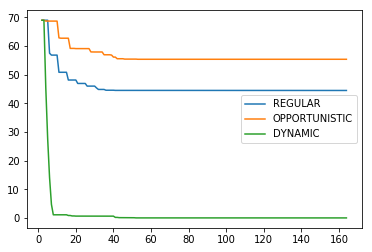

In [188]:
PATH = '/home/noyt/Desktop/BA6/MTH8418/Devoir2/executions/executions'

for i in range(len(startPtsGRIEWANK)):
    
    data_no = pd.read_csv(PATH+'/GRIEWANK/{}/COOD_SEARCH_REGULAR/res.txt'.format(i+1), sep= '\s+', header = None)
    data_quad = pd.read_csv(PATH+'/GRIEWANK/{}/COOD_SEARCH_OPPORTUNISTIC/res.txt'.format(i+1), sep= '\s+', header = None)
    data_tgp = pd.read_csv(PATH+'/GRIEWANK/{}/COOD_SEARCH_DYNAMIC/res.txt'.format(i+1), sep= '\s+', header = None)

#help(data_no.plot)
#data_no.plot(x = 'A', y='D')

sets = [data_no, data_quad, data_tgp]
for df in sets:
    df.columns = ['A', 'B', 'C', 'D']
    
global_max = max(data_no.A.max(), data_quad.A.max(), data_tgp.A.max())
global_min = min(data_no.A.min(), data_quad.A.min(), data_tgp.A.min())

for i in np.arange(3):
    idx = np.arange(global_min, global_max+1)
    sets[i] = sets[i].set_index('A')
    sets[i] = pd.DataFrame.from_dict(
               {i: x.values  for i, x in sets[i].groupby('A')['D']},
                orient='index').reindex(idx).ffill()

zog = pd.concat([sets[0], sets[1], sets[2]], axis=1)
zog.columns = ['REGULAR', 'OPPORTUNISTIC', 'DYNAMIC']
zog.plot(logx=0, logy = 0)
help(zog.plot)